<a href="https://colab.research.google.com/github/yuliagrajewska/Computer-Vision-projects/blob/main/harris_corner_detector/harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
#convolution function
def convolve2d(image, kernel):
  sizeX, sizeY = image.shape
  kernel = np.flipud(np.fliplr(kernel))
  stride = 1
  k_sizeX, k_sizeY = kernel.shape
  padding = get_padding_size(k_sizeX)
  padded_img = add_padding(image,padding)

  im_sizeX, im_sizeY = padded_img.shape
  targX,targY = target_size(sizeX, k_sizeX), target_size(sizeY, k_sizeY)
  output = np.zeros((sizeX,sizeY))

  for y in range(0,targY,stride):
    if y > im_sizeY-k_sizeY:
      break

    for x in range(0,targX,stride):
      if x > im_sizeX-k_sizeX:
        break
      res = padded_img[x:x+k_sizeX, y:y+k_sizeY]
      output[x, y] = np.sum(np.multiply(res, kernel))

  return output

def get_padding_size(k_size):
  return k_size//2

def add_padding(image, padding):
  padded_img = np.zeros(shape = (image.shape[0]+padding*2, image.shape[1]+padding*2))
  padded_img[padding:-padding, padding:-padding] = image
  return padded_img

In [ ]:
def target_size(img, kernel):
    n = 0
    # From 0 up to img size
    for i in range(img):
        # + kernel size
        added = i + kernel
        if added <= img:
            n += 1
    return n

In [ ]:
#Sobel kernels
Sx = np.array([[-1, 0, 1],
               [ -2, 0, 2],
               [-1, 0, 1]])

Sy = np.array([[1, 2, 1],
               [0, 0, 0],
              [-1, -2, -1]])

In [ ]:
#function for reading an image file
def read_image(image_name):
  input_image = cv2.imread(image_name)
  #print(input_image.shape)
  input_image = cv2.cvtColor(src=input_image, code=cv2.COLOR_BGR2GRAY)
  return input_image


In [ ]:
#reading the imag in color
def read_image2(image_name):
  input_image = cv2.imread(image_name)
  #print(input_image.shape)
  input_image = cv2.cvtColor(src=input_image, code=cv2.COLOR_BGR2RGB)
  return input_image

In [ ]:
def harris(img_name,k,threshold,window_size):

    img = read_image2(img_name)
    gray = read_image(img_name)
    X,Y = img.shape[0], img.shape[1]
    R = np.zeros((X,Y))

    #Image derivatives
    dx = convolve2d(gray,Sx)
    dy = convolve2d(gray,Sy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    off = int( window_size / 2 )
    for y in range(off, X-off):
        for x in range(off, Y-off):
            Sx2 = np.sum(dx2[y-off:y+1+off, x-off:x+1+off])
            Sy2 = np.sum(dy2[y-off:y+1+off, x-off:x+1+off])
            Sxy = np.sum(dxy[y-off:y+1+off, x-off:x+1+off])

            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #response function
            det=np.linalg.det(H)
            trace=np.matrix.trace(H)
            Resp=det-k*(trace**2)
            R[int(y-off),int(x-off)]=Resp

    # thresholding
    cv2.normalize(R, R, 0, 1, cv2.NORM_MINMAX)
    for y in range(off, X-off):
        for x in range(off, Y-off):
            val=R[y, x]
            if val>threshold:
                cv2.circle(img,(x,y),1,(255,0,0))

    plt.imshow(img)
    plt.title("Harris detector")
    plt.savefig('Harris.png', dpi = 200)
    plt.show()


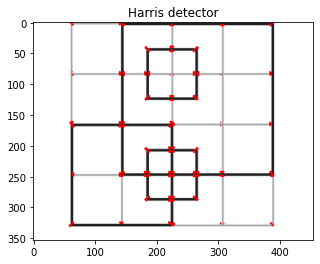

In [ ]:
harris("box.jpg", 0.04, 0.15, 3)

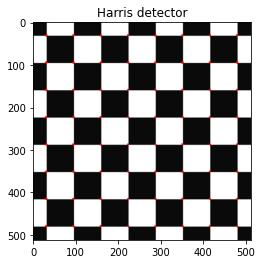

In [ ]:
harris("Box2.jpg", 0.04, 0.4, 3)